In [1]:
import matplotlib.pyplot as plt
from bokeh.io import show, output_file
from bokeh.plotting import figure
import numpy as np
from gensim.models import CoherenceModel

from pipeline.lda import LDABuilder
from pipeline.paths import Paths
from pipeline.utils import read_doc_by_line

In [2]:
paths = Paths()
text_corpus = [doc.split() for doc in read_doc_by_line(paths.trigram_corpus_filepath)]

In [3]:
lda_builder = LDABuilder('sdfg')
lda = lda_builder.get_model(n_topics=1000, from_scratch=False)
dictionary = lda_builder.get_corpus_dict()
bow_corpus = lda_builder.get_trigram_bow_corpus(dictionary)

Loading LDA model (n_topics=1000)...
Loading trigram dict...
Loading bow corpus...


In [ ]:
cm_umass = CoherenceModel(model=lda, corpus=bow_corpus, dictionary=dictionary, coherence='u_mass')

In [ ]:
cm_cv    = CoherenceModel(model=lda, texts=text_corpus, dictionary=dictionary, coherence='c_v', processes=6)

In [ ]:
cm_uci   = CoherenceModel(model=lda, texts=text_corpus, dictionary=dictionary, coherence='c_uci', processes=6)

In [6]:
cm_npmi  = CoherenceModel(model=lda, texts=text_corpus, dictionary=dictionary, coherence='c_npmi', processes=3)

In [ ]:
coherence1000 = cm_npmi.get_coherence()

In [ ]:
coherence1000

In [ ]:
c_models = [cm_umass, cm_cv, cm_uci, cm_npmi]
names = [m.coherence for m in c_models]
coherences = [m.get_coherence() for m in c_models]

In [ ]:
p = figure(x_range=names, plot_height=250, title="Coherences for LDA with 100 topics")
p.vbar(x=names, top=[coherences], width=0.8)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

## Compare num topics

In [4]:
topic_vals = [50, 75, 100, 200, 1000]

In [ ]:
coherences = []

for n_topics in topic_vals:
    lda = lda_builder.get_model(n_topics=n_topics, from_scratch=False)
    cm = CoherenceModel(model=lda, texts=text_corpus, dictionary=dictionary, coherence='c_npmi', processes=7)
    coherences.append(cm.get_coherence())

In [9]:
topic_coh = np.array(list(zip(topic_vals[:4], coherences)))
np.save('coherences', topic_coh)

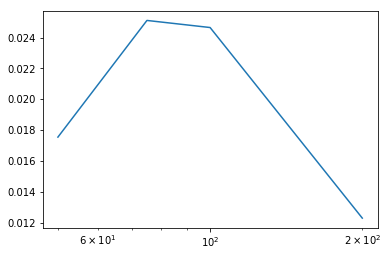

In [10]:
plt.semilogx(topic_vals[:4], coherences)
plt.show()